<a href="https://colab.research.google.com/github/DeexithDS/Bank-Marketing-Outcome-Using-Decison-Trees/blob/master/D%26A_Deexith_Reddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

##Models:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier #pip install xgboost
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [51]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
##Loading tables and merging based on offer number
df=pd.read_csv("/content/drive/MyDrive/D&A Case Study/trainHistory.csv")
df1=pd.read_csv("/content/drive/MyDrive/D&A Case Study/offers.csv")
new=pd.merge(df,df1,left_on='offer',right_on='offer')

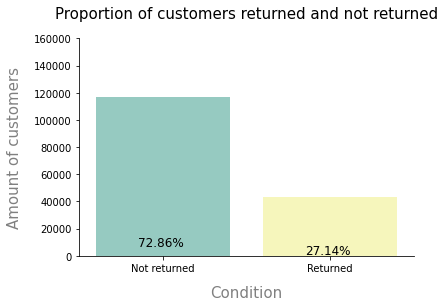

In [54]:
##Categorical variables
new["repeater"] =new["repeater"].astype('category')
new["repeater"] =new["repeater"].cat.codes

##Checking if the categorical variables worked
df.loc[df['id'] == 15753725]
new.loc[new['id'] == 15753725]

##Calculating percentage returned and not returned

amount_notreturned = new[new['repeater'] == 0]['repeater'].count() / new.shape[0] * 100
amount_returned = new[new['repeater'] == 1]['repeater'].count() / new.shape[0] * 100

sns.countplot(x='repeater', palette="Set3", data=new)
plt.xticks([0, 1], ['Not returned', 'Returned'])
plt.xlabel('Condition', size=15, labelpad=12, color='grey')
plt.ylabel('Amount of customers', size=15, labelpad=12, color='grey')
plt.title("Proportion of customers returned and not returned", size=15, pad=20)
plt.ylim(0, 160000)
plt.text(-0.15, 7000, f"{round(amount_notreturned, 2)}%", fontsize=12)
plt.text(0.85, 1000, f"{round(amount_returned, 2)}%", fontsize=12)
sns.despine()



In [55]:
brandrepeater=new[['repeater','brand']]
brandrepeater
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(brandrepeater[['brand']]).toarray())
enc_df
brandrepeater = brandrepeater.join(enc_df)



y=brandrepeater["repeater"]
x=brandrepeater.drop(["repeater","brand"],axis=1)


logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.545240
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.067      
Dependent Variable: repeater         AIC:              174562.9713
Date:               2021-03-28 04:14 BIC:              174682.7707
No. Observations:   160057           Log-Likelihood:   -87269.    
Df Model:           11               LL-Null:          -93575.    
Df Residuals:       160045           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
0        -1.4750     0.0682    -21.6207   0.0000   -1.6088   -1.3413
1        -0.7632     0.0158    -48.2372   0.0

In [56]:
##Except for one brand "3", all other brands were significant on the customers repeating
x=x.drop(3,axis=1)

##After "3" is dropped, all have high significance

In [57]:
#OFFERVALUE
##Checking if offer value has an effect on the returning of customer
##Six unique values
corr, _ = pearsonr(new['offervalue'], new['repeater'])
print('Pearsons correlation: %.3f' % corr)

new=new.drop('offervalue',axis=1)
#-0.044


Pearsons correlation: -0.044


In [ ]:
##Company

companyrepeater=new[['repeater','company']]
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(companyrepeater[['company']]).toarray())
enc_df
companyrepeater = companyrepeater.join(enc_df)



y=companyrepeater["repeater"]
x=companyrepeater.drop(["repeater","company"],axis=1)


logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

##Company 6 is not significant

In [ ]:
##Quantity has only one value, "1". So we delete

new['quantity'].unique()
##array([1], dtype=int64)
new=new.drop('quantity',axis=1)

In [59]:
##Category:
categoryrepeater=new[['repeater','category']]
categoryrepeater
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(categoryrepeater[['category']]).toarray())
categoryrepeater = categoryrepeater.join(enc_df)
categoryrepeater
y=categoryrepeater["repeater"]
x=categoryrepeater.drop(["repeater","category"],axis=1)

logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

##All categories are important

Optimization terminated successfully.
         Current function value: 0.545366
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.067      
Dependent Variable: repeater         AIC:              174605.3760
Date:               2021-03-28 04:15 BIC:              174735.1587
No. Observations:   160057           Log-Likelihood:   -87290.    
Df Model:           12               LL-Null:          -93575.    
Df Residuals:       160044           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
0        -2.3002     0.0539    -42.6917   0.0000   -2.4058   -2.1946
1        -1.7602     0.0355    -49.5301   0.0

In [60]:
y=new["repeater"]
x=new["repeattrips"]

logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

new=new.drop('repeattrips',axis=1)

##Repeat trips has no significance

         Current function value: 0.505033
         Iterations: 35
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.136      
Dependent Variable: repeater         AIC:              161670.2621
Date:               2021-03-28 04:15 BIC:              161680.2454
No. Observations:   160057           Log-Likelihood:   -80834.    
Df Model:           0                LL-Null:          -93575.    
Df Residuals:       160056           LLR p-value:      nan        
Converged:          0.0000           Scale:            1.0000     
No. Iterations:     35.0000                                       
------------------------------------------------------------------
                Coef.  Std.Err.   z    P>|z|    [0.025     0.975] 
------------------------------------------------------------------
repeattrips    23.5720 835.3713 0.0282 0.9775 -1613.7257 1660.8697



In [61]:
##Checking for market:
marketrepeater=new[['repeater','market']]
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(marketrepeater[['market']]).toarray())
marketrepeater = marketrepeater.join(enc_df)
y=marketrepeater["repeater"]
x=marketrepeater.drop(["repeater","market"],axis=1)
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

##All markets are important

Optimization terminated successfully.
         Current function value: 0.576870
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.013      
Dependent Variable: repeater         AIC:              184732.2355
Date:               2021-03-28 04:15 BIC:              185071.6672
No. Observations:   160057           Log-Likelihood:   -92332.    
Df Model:           33               LL-Null:          -93575.    
Df Residuals:       160023           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
---------------------------------------------------------------------
       Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
---------------------------------------------------------------------
0     -1.4932      0.0364    -41.0153    0.0000    -1.5645    -1.4218
1     -1.9259      0.0664    -29.0125    

In [62]:
##Offers:



##Offer 1194044 is not important as p-value is high

offersrepeater=new[['repeater','offer']]
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(offersrepeater[['offer']]).toarray())
offersrepeater = offersrepeater.join(enc_df)
y=offersrepeater["repeater"]
x=offersrepeater.drop(["repeater","offer"],axis=1)
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.544697
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.068      
Dependent Variable: repeater         AIC:              174413.0017
Date:               2021-03-28 04:15 BIC:              174652.6006
No. Observations:   160057           Log-Likelihood:   -87183.    
Df Model:           23               LL-Null:          -93575.    
Df Residuals:       160033           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
0         0.0282     0.0242      1.1633   0.2447   -0.0193    0.0757
1        -1.4126     0.0118   -119.7712   0.0

In [63]:
##Chain

corr, _ = pearsonr(new['chain'], new['repeater'])
print('Pearsons correlation: %.3f' % corr)


new=new.drop('chain',axis=1)
##Not correlated

Pearsons correlation: -0.007


In [64]:
##Dropping the ID and offerdate

new=new.drop('id',axis=1)
new=new.drop('offerdate',axis=1)


In [65]:
##Label Encoding:

##Offer:
new['offer'] = new.offer.astype('category')
df2=pd.get_dummies(new[["offer"]])
new=pd.concat([new,df2],axis=1)
new=new.drop('offer',axis=1)
new=new.drop('offer_1194044',axis=1) ##Dropping insignificant offer

##Company:

new['company'] = new.company.astype('category')
df2=pd.get_dummies(new[["company"]])
new=pd.concat([new,df2],axis=1)
new=new.drop('company',axis=1)
new=new.drop('company_107127979',axis=1) ##Dropping insignificant company

#Brand
new['brand'] = new.brand.astype('category')
df2=pd.get_dummies(new[["brand"]])
new=pd.concat([new,df2],axis=1)
new=new.drop('brand',axis=1)
new=new.drop('brand_6732',axis=1) ##Dropping insignificant brand


##Market
new['market'] = new.market.astype('category')
df2=pd.get_dummies(new[["market"]])
new=pd.concat([new,df2],axis=1)
new=new.drop('market',axis=1) 

##Category 
new['category'] = new.category.astype('category')
df2=pd.get_dummies(new[["category"]])
new=pd.concat([new,df2],axis=1)
new=new.drop('category',axis=1)



In [66]:
##Splitting to make ready for modelling
x=new.drop('repeater',axis=1)
y=new['repeater']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
Logistic regression
Decision tree
Random forest
Stocastic Gradient Descend
Nearest Neighbours Classifiers
Gaussian Process Classification
Other ensemble
Neural Network Models
XGBoost

In [67]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=20)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA', ensemble.AdaBoostClassifier()))
models.append(('BAG', ensemble.BaggingClassifier()))
models.append(('TRE', ensemble.ExtraTreesClassifier()))
models.append(('GRA', ensemble.GradientBoostingClassifier()))
models.append(('RAN', ensemble.RandomForestClassifier()))
models.append(('PAS', linear_model.PassiveAggressiveClassifier()))
models.append(('RID', linear_model.RidgeClassifierCV()))
models.append(('SDG', linear_model.SGDClassifier()))
models.append(('PER', linear_model.Perceptron()))
#Navies Bayes
models.append(('BER', naive_bayes.BernoulliNB()))
models.append(('GAU', naive_bayes.GaussianNB())) 
#Trees    
models.append(('EXT', tree.ExtraTreeClassifier()))

seed = 42
results = []
names = []

# store preds
from sklearn.model_selection import cross_val_predict
dwPreds = []
for name, model in models:
    kfold = KFold(n_splits=13, random_state=seed, shuffle=True)
    # store the metrics
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %s= %f %s= (%f)" % (name, 'Mean', cv_results.mean(), 'Std', cv_results.std())
    print(msg)

LR: Mean= 0.731686 Std= (0.003739)
LDA: Mean= 0.731910 Std= (0.004121)
KNN: Mean= 0.718340 Std= (0.006621)
CART: Mean= 0.734843 Std= (0.003792)
NB: Mean= 0.496801 Std= (0.002593)
XGB: Mean= 0.732252 Std= (0.003699)
ADA: Mean= 0.731502 Std= (0.003646)
BAG: Mean= 0.734618 Std= (0.003908)
TRE: Mean= 0.734851 Std= (0.003794)
GRA: Mean= 0.732460 Std= (0.003753)
RAN: Mean= 0.734751 Std= (0.003809)
PAS: Mean= 0.582688 Std= (0.125416)
RID: Mean= 0.730952 Std= (0.003747)
SDG: Mean= 0.730386 Std= (0.004248)
PER: Mean= 0.628597 Std= (0.100595)
BER: Mean= 0.682486 Std= (0.002948)
GAU: Mean= 0.496801 Std= (0.002593)
EXT: Mean= 0.734843 Std= (0.003792)


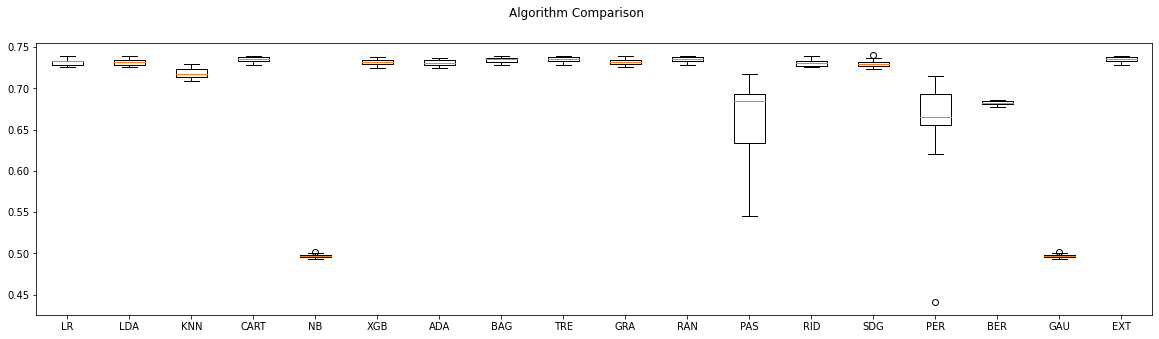

In [ ]:
from matplotlib import pyplot

fig = pyplot.figure(figsize=(20,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

AxesSubplot(0.125,0.125;0.62x0.755)


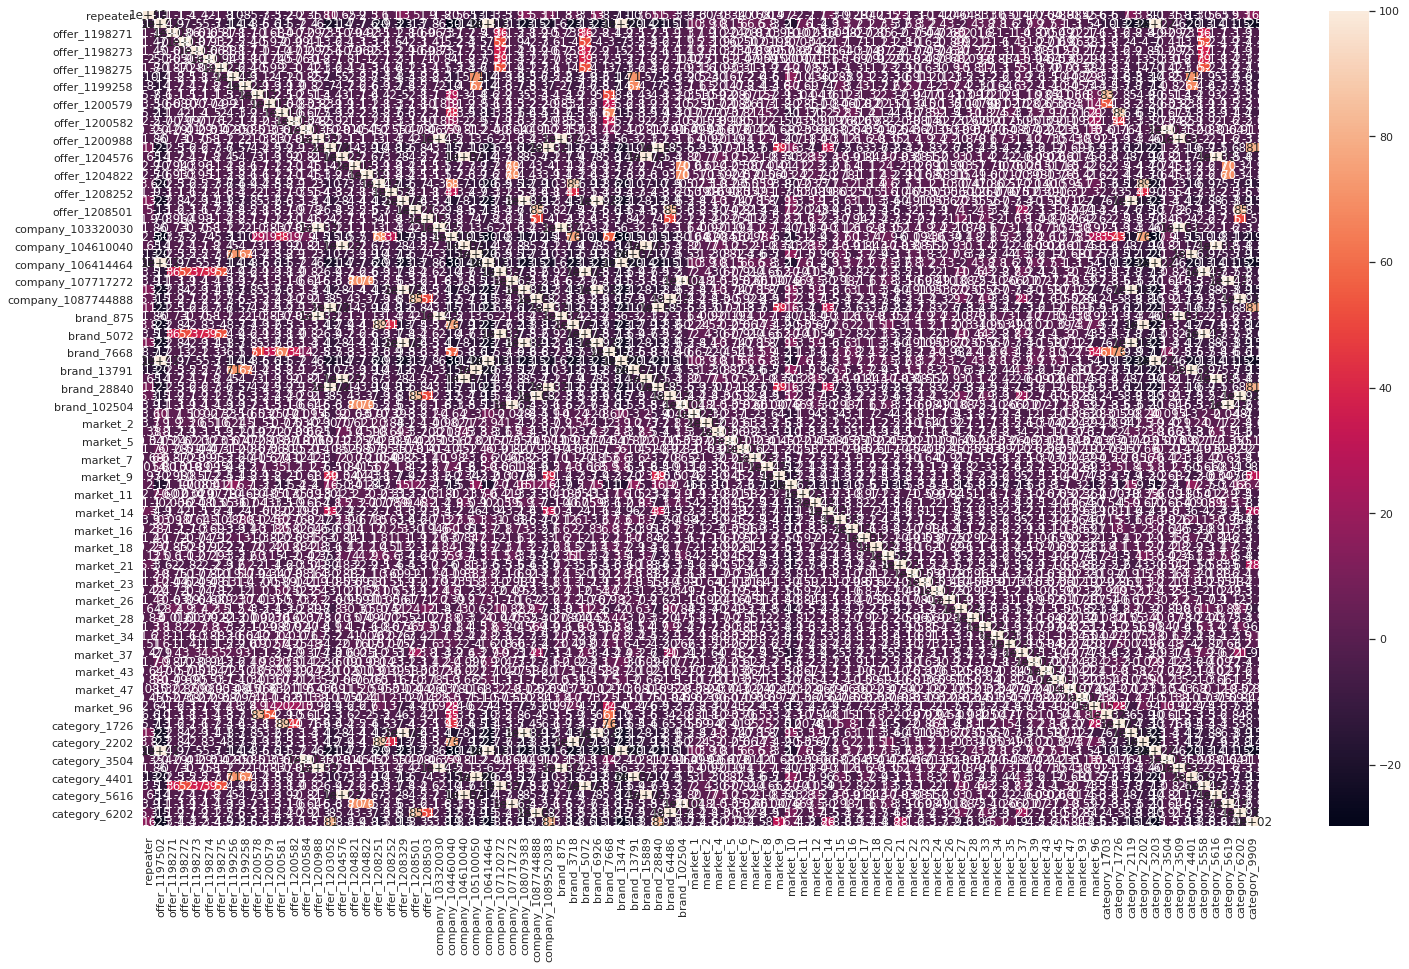

In [ ]:
sns.set(rc = {'figure.figsize':(25,15)})
print(sns.heatmap(data = new.corr()*100, annot = True, fmt = '.2g'))

In [18]:
# creating an instance of the decision tree classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14)
# max_depth=10 - The maximum depth of the tree.
# random_state=14 - Controls the randomness of the estimator. 

# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.730675996501312

In [19]:
classifier = DecisionTreeClassifier(max_depth=100, random_state=14) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.7306260152442834

In [20]:
#Now going onto Grid Search CV

from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.7349594330455524


In [ ]:
classifier = grid_tree.best_estimator_
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.730675996501312

In [21]:
features =new.drop('repeater',axis=1)

In [22]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(classifier, features)

,feat,score
91,"(c, a, t, e, g, o, r, y, _, 9, 9, 0, 9)",0.282616
37,"(b, r, a, n, d, _, 6, 9, 2, 6)",0.277410
86,"(c, a, t, e, g, o, r, y, _, 4, 4, 0, 1)",0.089749
82,"(c, a, t, e, g, o, r, y, _, 2, 2, 0, 2)",0.076246
90,"(c, a, t, e, g, o, r, y, _, 6, 2, 0, 2)",0.067424
...,...,...
27,"(c, o, m, p, a, n, y, _, 1, 0, 5, 1, 0, 0, 0, ...",0.000000
26,"(c, o, m, p, a, n, y, _, 1, 0, 4, 6, 1, 0, 0, ...",0.000000
25,"(c, o, m, p, a, n, y, _, 1, 0, 4, 4, 6, 0, 0, ...",0.000000
21,"(o, f, f, e, r, _, 1, 2, 0, 8, 3, 2, 9)",0.000000


In [23]:
#A better metric is the f1-score, which takes into account the false positives, the false negatives etc.

from sklearn.metrics import f1_score

#recreate the model and evaluate it
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
classifier.fit(X_train, y_train) #same classifier as before
predictions = classifier.predict(X_test)
f1_score(y_true = y_test, y_pred = predictions)

0.230456200471193

In [24]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
 
#print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

True Positive (TP): 1614
True Negative (TN): 27622
False Positive (FP): 1415
False Negative (FN): 9364


In [25]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1')
grid_tree.fit(X_train, y_train)
best = grid_tree.best_estimator_
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

classifier = best
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print("-------------")
print(f1_score(y_true = y_test, y_pred = predictions))
print(get_feature_importance(classifier, features))
print("-------------")

TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
#print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.22928628355785263
-------------
0.23074182284614836
                                                 feat     score
37                     (b, r, a, n, d, _, 6, 9, 2, 6)  0.282627
91            (c, a, t, e, g, o, r, y, _, 9, 9, 0, 9)  0.274154
86            (c, a, t, e, g, o, r, y, _, 4, 4, 0, 1)  0.132221
35                     (b, r, a, n, d, _, 3, 7, 1, 8)  0.087555
90            (c, a, t, e, g, o, r, y, _, 6, 2, 0, 2)  0.071744
..                                                ...       ...
28  (c, o, m, p, a, n, y, _, 1, 0, 6, 4, 1, 4, 4, ...  0.000000
27  (c, o

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)

print(accuracy_score(y_test, predicted_y))
print(confusion_matrix(y_test, predicted_y))
print(classification_report(y_test, predicted_y))

0.7292265400474822
[[27775  1262]
 [ 9573  1405]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84     29037
           1       0.53      0.13      0.21     10978

    accuracy                           0.73     40015
   macro avg       0.64      0.54      0.52     40015
weighted avg       0.68      0.73      0.66     40015



In [29]:
model = ensemble.GradientBoostingClassifier(learning_rate=0.1, n_estimators=120, max_depth=5)
model.fit(X_train, y_train)
predicted_test_y = model.predict(X_test)

print(accuracy_score(y_test, predicted_test_y))
print(confusion_matrix(y_test, predicted_test_y))
print(classification_report(y_test, predicted_test_y))

0.7306510058727977
[[27626  1411]
 [ 9367  1611]]
              precision    recall  f1-score   support

           0       0.75      0.95      0.84     29037
           1       0.53      0.15      0.23     10978

    accuracy                           0.73     40015
   macro avg       0.64      0.55      0.53     40015
weighted avg       0.69      0.73      0.67     40015



In [30]:
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

param_grid = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced'], 'n_jobs' : [-1]} #use all the computational power you have
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_test, y_test)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_normal = grid_forest.best_estimator_

CPU times: user 2min 10s, sys: 5.2 s, total: 2min 15s
Wall time: 11min 45s
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.4910870208392243


In [31]:
# Normal sample training
%time forest_normal.fit(X_train, y_train)
predictions = forest_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(forest_normal, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

CPU times: user 2min 35s, sys: 383 ms, total: 2min 35s
Wall time: 1min 19s
-------------
f1 score: 0.496
Accuracy: 0.636
-------------
                                                 feat     score
91            (c, a, t, e, g, o, r, y, _, 9, 9, 0, 9)  0.091657
86            (c, a, t, e, g, o, r, y, _, 4, 4, 0, 1)  0.062997
27  (c, o, m, p, a, n, y, _, 1, 0, 5, 1, 0, 0, 0, ...  0.059245
40                  (b, r, a, n, d, _, 1, 3, 7, 9, 1)  0.053571
38                     (b, r, a, n, d, _, 7, 6, 6, 8)  0.037146
..                                                ...       ...
48                           (m, a, r, k, e, t, _, 5)  0.001050
23            (o, f, f, e, r, _, 1, 2, 0, 8, 5, 0, 3)  0.001002
13            (o, f, f, e, r, _, 1, 2, 0, 0, 5, 8, 4)  0.000290
84            (c, a, t, e, g, o, r, y, _, 3, 5, 0, 4)  0.000279
0                            (q, u, a, n, t, i, t, y)  0.000000

[92 rows x 2 columns]
-------------
True Positives: 7156
False Positive: 10744
True Negative: 18

Recommender Engine

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/D&A Case Study/trainHistory.csv")
df1=pd.read_csv("/content/drive/MyDrive/D&A Case Study/offers.csv")
f=pd.merge(df,df1,left_on='offer',right_on='offer')

In [ ]:
f=f.drop(['market','chain','repeattrips','offerdate','repeater','quantity'],axis=1)
f=f.drop(['offer','offervalue'],axis=1)

In [ ]:
f['company'] = f.company.astype('category')
df2=pd.get_dummies(f[["company"]])
f=pd.concat([f,df2],axis=1)
f=f.drop('company',axis=1)

f['brand'] = f.brand.astype('category')
df2=pd.get_dummies(f[["brand"]])
f=pd.concat([f,df2],axis=1)
f=f.drop('brand',axis=1)

f['category'] = f.category.astype('category')
df2=pd.get_dummies(f[["category"]])
f=pd.concat([f,df2],axis=1)
f=f.drop('category',axis=1)

In [ ]:
##Creating basic dataframe with all information
t=pd.merge(df,df1,left_on='offer',right_on='offer')

In [ ]:
##Creating index as a new column
k=pd.Series(range(0,160057))
t=t.set_index(k)
t['index'] = t.index

In [ ]:
##Creating a list for each customer
k=f.drop('id',axis=1)
df_list=k.values.tolist()

In [ ]:
def recommender(n):
 c=[]
 e=[]
 f=[]
 g=[]
 h=[]
 for i in range(0,160057):
  if i!=n:   
   cos_sim=np.dot(df_list[n],df_list[i])/(np.linalg.norm(df_list[n])*np.linalg.norm(df_list[i]))
   c.append(cos_sim)
   e.append(i)
   f.append(list(t.loc[t['index'] == i, 'brand']))
   g.append(list(t.loc[t['index'] == i, 'company']))
   h.append(list(t.loc[t['index'] == i, 'category']))
 return(sorted(zip(e,f,g,h), reverse=True)[:3])


In [ ]:
recommender(1000)

[(160056, [7668], [104460040], [3504]),
 (160055, [7668], [104460040], [3504]),
 (160054, [7668], [104460040], [3504])]